In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
def task_1():
    df = pd.read_csv("heart_cleveland_upload.csv")
    df.info()
    df.describe()
    sns.countplot(x="cp", data=df, palette="pastel")

In [21]:
matrix = np.random.randint(1, 11, size=(10, 20))
matrix

array([[ 1,  6,  7,  1,  1,  7,  4,  4,  1,  2,  5,  5,  6,  4,  5, 10,
         9,  7,  6,  7],
       [ 4,  2, 10,  8,  8,  7,  8, 10,  9,  3,  3,  5,  2,  4,  2,  9,
         4,  9,  3,  3],
       [ 2, 10,  2,  6,  9,  6,  4,  4,  4,  9,  8,  5,  4,  6,  6,  3,
         4,  2,  5,  7],
       [ 1,  1,  6, 10,  4,  9,  7,  6,  2,  8,  3,  9,  6,  6,  9,  2,
         3, 10,  5,  6],
       [ 2,  5,  8,  7,  4,  4,  9,  6,  3,  9,  1,  5,  8,  6,  2,  2,
         2,  7, 10,  1],
       [ 4,  5,  6,  9,  7,  4, 10,  7,  3,  6,  5,  8,  9, 10,  5,  8,
         6,  1,  4,  4],
       [ 8,  3,  8,  9,  4,  6,  3,  6,  3,  2,  4,  1,  2,  1,  5,  9,
         5,  7,  1,  5],
       [ 8,  4,  4,  8, 10,  1,  4,  6,  9,  1,  3,  5,  7,  5,  4, 10,
        10,  1,  4,  8],
       [ 8,  8,  3,  5,  1,  1,  6,  3,  4,  7,  7,  8,  9,  2,  6,  9,
         4,  9, 10, 10],
       [ 3, 10,  7,  7,  2,  2,  3,  1,  7,  4,  5,  1,  2,  2,  9,  1,
         5,  4,  6,  6]])

In [22]:
matrix[matrix > 5] = 10
matrix

array([[ 1, 10, 10,  1,  1, 10,  4,  4,  1,  2,  5,  5, 10,  4,  5, 10,
        10, 10, 10, 10],
       [ 4,  2, 10, 10, 10, 10, 10, 10, 10,  3,  3,  5,  2,  4,  2, 10,
         4, 10,  3,  3],
       [ 2, 10,  2, 10, 10, 10,  4,  4,  4, 10, 10,  5,  4, 10, 10,  3,
         4,  2,  5, 10],
       [ 1,  1, 10, 10,  4, 10, 10, 10,  2, 10,  3, 10, 10, 10, 10,  2,
         3, 10,  5, 10],
       [ 2,  5, 10, 10,  4,  4, 10, 10,  3, 10,  1,  5, 10, 10,  2,  2,
         2, 10, 10,  1],
       [ 4,  5, 10, 10, 10,  4, 10, 10,  3, 10,  5, 10, 10, 10,  5, 10,
        10,  1,  4,  4],
       [10,  3, 10, 10,  4, 10,  3, 10,  3,  2,  4,  1,  2,  1,  5, 10,
         5, 10,  1,  5],
       [10,  4,  4, 10, 10,  1,  4, 10, 10,  1,  3,  5, 10,  5,  4, 10,
        10,  1,  4, 10],
       [10, 10,  3,  5,  1,  1, 10,  3,  4, 10, 10, 10, 10,  2, 10, 10,
         4, 10, 10, 10],
       [ 3, 10, 10, 10,  2,  2,  3,  1, 10,  4,  5,  1,  2,  2, 10,  1,
         5,  4, 10, 10]])

## ПРАКТИЧЕСКАЯ РЕАЛИЗАЦИЯ МОДЕЛИ DID РЕГРЕССИИ

In [24]:
import statsmodels.api as sm


def task_4():
    url = "https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Model_Estimation/Data/Two_by_Two_Difference_in_Difference/did_crime.xlsx"

    df = pd.read_excel(url)

    df["after"] = df["year"] >= 2014
    df["treatafter"] = df["after"] * df["treat"]

    ax = df.pivot(index="year", columns="treat", values="murder").plot(
        figsize=(20, 10),
        marker=".",
        markersize=20,
        title="Murder and Time",
        xlabel="Year",
        ylabel="Murder Rate",
        xticks=df["year"].drop_duplicates().sort_values().astype("int"),
    )

    ax.axvline(x=2014, color="gray", linestyle="--")
    ax.legend(
        loc="upper left", title="treat", prop={"size": 20}
    )  # сместим и увеличим легенду

    X = sm.add_constant(df[["treat", "treatafter", "after"]].astype("float"))
    y = df["murder"]
    sm_fit = sm.OLS(y, X).fit()

    print(sm_fit.summary())

Особенность Difference-in-Differences заключается в том, что он учитывает как изменения во времени внутри каждой группы (воздействия и контроля), так и различия между этими группами в изменениях. Это позволяет учесть временные изменения, которые могли бы произойти независимо от воздействия, и выделить влияние конкретного воздействия.

## СОЗДАНИЕ АРХИТЕКТУР НЕЙРОННЫХ СЕТЕЙ С ПОМОЩЬЮ PYTORCH

In [6]:
import torch
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [25]:
X, Y = make_classification(
    n_samples=500,
    n_features=5,  # Количество входных переменных
    n_informative=3,  # Количество значимых переменных
    n_redundant=0,  # Количество избыточных переменных
    n_classes=4,  # Количество классов
    n_clusters_per_class=2,  # Количество кластеров на класс
    random_state=42,  # Зафиксированный seed для воспроизводимости
)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

classes = np.unique(Y_train)

In [53]:
from torch.utils.data import Dataset, DataLoader


class Data(Dataset):
    def __init__(self, x_train, y_train):
        self.X = torch.Tensor(x_train)
        self.Y = torch.LongTensor(y_train)
        self.len = self.X.shape[0]
        self._i = 0

    def __next__(self):
        res = self.X[self._i], self.Y[self._i]
        self._i += 1
        return res

    def __iter__(self):
        return self

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

    def __len__(self):
        return self.len


train_data_loader = DataLoader(
    dataset=Data(X_train, Y_train), batch_size=4, shuffle=True
)
test_data_loader = DataLoader(dataset=Data(X_test, Y_test), batch_size=4)

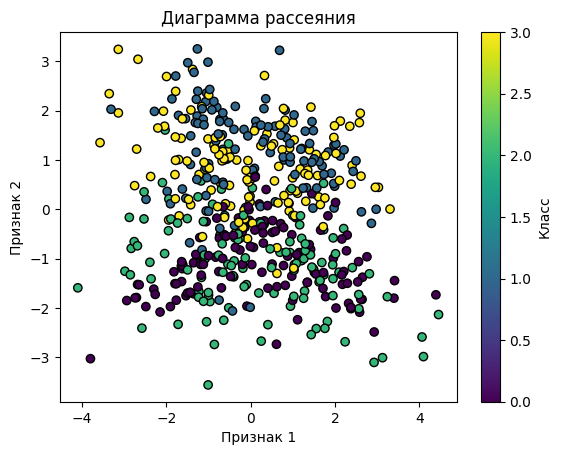

In [54]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", marker="o", edgecolors="k")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Диаграмма рассеяния")
plt.colorbar(label="Класс")
plt.show()

In [55]:
import torch.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.activation = nn.ReLU()
        self.non_linear_activation = nn.LogSigmoid()
        self.layer1 = nn.Linear(input_size, 32)  # Первый скрытый слой
        self.layer2 = nn.Linear(32, 64)  # Второй скрытый слой
        self.output_layer = nn.Linear(64, output_size)  # Выходной слой

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.non_linear_activation(self.layer2(x))
        output = self.output_layer(x)
        return output

In [56]:
def losses_plot(losses: list):
    plt.plot(losses)
    plt.xlabel("Эпоха")
    plt.ylabel("Потери")
    plt.title("Потери в обучении на протяжении эпох")
    plt.show()

In [57]:
def learn_model(
    _optimizer: torch.optim.Optimizer, _criterion, _net: NeuralNetwork, epochs=5
):
    losses: list[float] = []

    for _ in range(epochs):
        running_loss = 0.0
        for data in train_data_loader:

            inputs, labels = data

            _optimizer.zero_grad()

            outputs = _net(inputs)
            loss = _criterion(outputs, labels)
            loss.backward()
            _optimizer.step()

            running_loss += loss.item()

        losses.append(running_loss / len(train_data_loader))
        running_loss = 0.0
    return losses

In [58]:
def predict(_net):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_data_loader:
            images, labels = data
            outputs = _net(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
            # собираем правильные прогнозы для каждого класса
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    print(f"Точность сети: {100 * correct // total}%")

    # Выводим точность на каждом классе
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f"Точность для класса: {classname} is {accuracy:.1f}%")

In [73]:
def task_5_1():
    model = NeuralNetwork(input_size=5, output_size=4)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

    losses = learn_model(optimizer, criterion, model, epochs=20)
    losses_plot(losses)
    predict(model)

In [74]:
class ImprovedNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImprovedNeuralNetwork, self).__init__()
        self.activation = nn.ReLU()
        self.layer1 = nn.Linear(input_size, hidden_size - 32)  # Первый скрытый слой
        self.layer2 = nn.Linear(hidden_size - 32, hidden_size)  # Второй скрытый слой
        self.output_layer = nn.Linear(hidden_size, output_size)  # Выходной слой

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        output = self.output_layer(x)
        return output

In [75]:
def task_5_2():
    model = ImprovedNeuralNetwork(input_size=5, hidden_size=128, output_size=4)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

    losses = learn_model(optimizer, criterion, model, epochs=20)
    losses_plot(losses)
    predict(model)

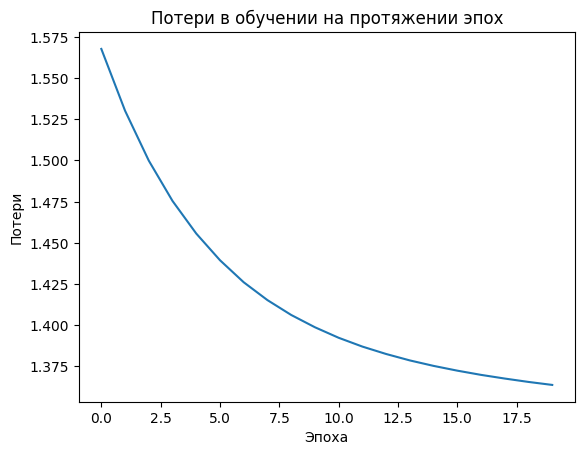

Точность сети: 30%
Точность для класса: 0 is 100.0%
Точность для класса: 1 is 0.0%
Точность для класса: 2 is 0.0%
Точность для класса: 3 is 40.0%


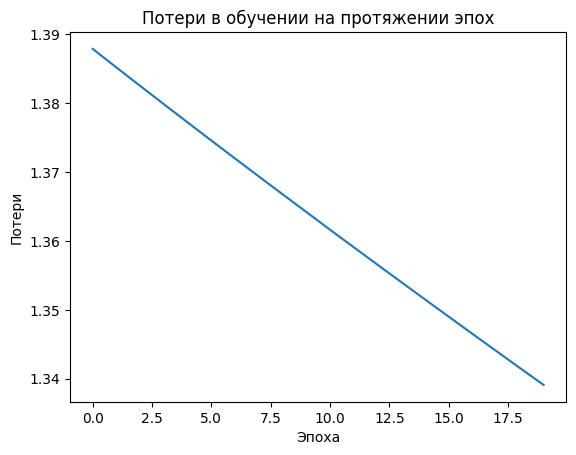

Точность сети: 47%
Точность для класса: 0 is 80.0%
Точность для класса: 1 is 44.0%
Точность для класса: 2 is 0.0%
Точность для класса: 3 is 80.0%


In [76]:
task_5_1()
task_5_2()

## ФУНКЦИИ ПОТЕРЬ И ОПТИМИЗАТОРЫ

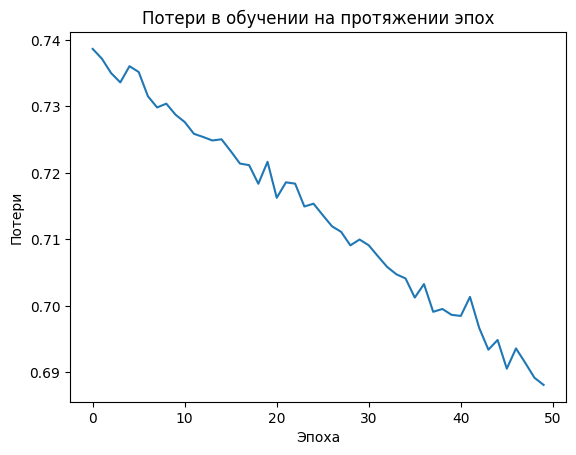

Точность сети: 27%
Точность для класса: 0 is 0.0%
Точность для класса: 1 is 0.0%
Точность для класса: 2 is 23.3%
Точность для класса: 3 is 80.0%


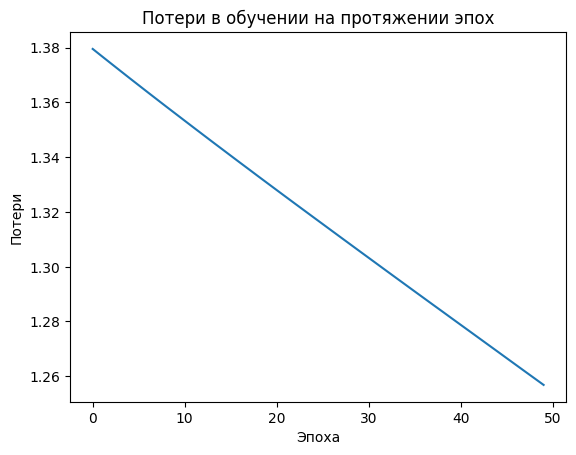

Точность сети: 63%
Точность для класса: 0 is 65.0%
Точность для класса: 1 is 96.0%
Точность для класса: 2 is 80.0%
Точность для класса: 3 is 8.0%


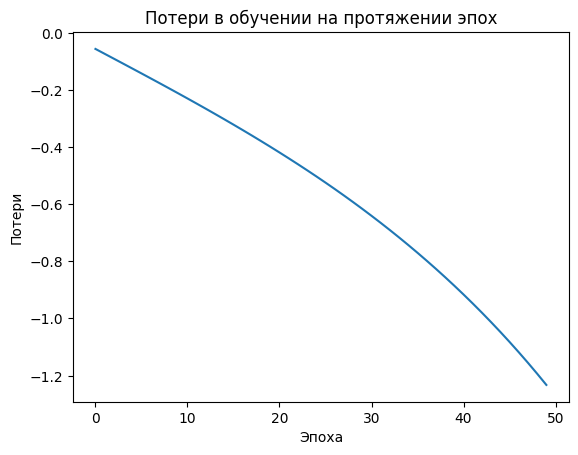

Точность сети: 58%
Точность для класса: 0 is 95.0%
Точность для класса: 1 is 64.0%
Точность для класса: 2 is 0.0%
Точность для класса: 3 is 92.0%


In [80]:
def task_6_1():
    funcs_loss = (nn.HingeEmbeddingLoss(), nn.CrossEntropyLoss(), nn.NLLLoss())
    for func in funcs_loss:
        model = ImprovedNeuralNetwork(input_size=5, hidden_size=128, output_size=4)
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
        losses = learn_model(optimizer, func, model, epochs=50)
        losses_plot(losses)
        predict(model)

task_6_1()

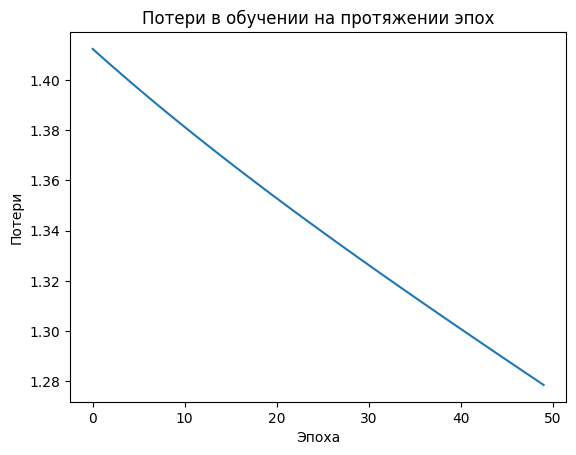

Точность сети: 55%
Точность для класса: 0 is 35.0%
Точность для класса: 1 is 76.0%
Точность для класса: 2 is 33.3%
Точность для класса: 3 is 76.0%


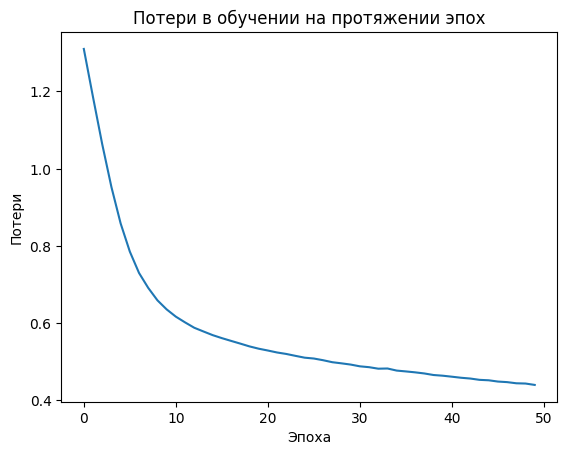

Точность сети: 84%
Точность для класса: 0 is 70.0%
Точность для класса: 1 is 96.0%
Точность для класса: 2 is 80.0%
Точность для класса: 3 is 88.0%


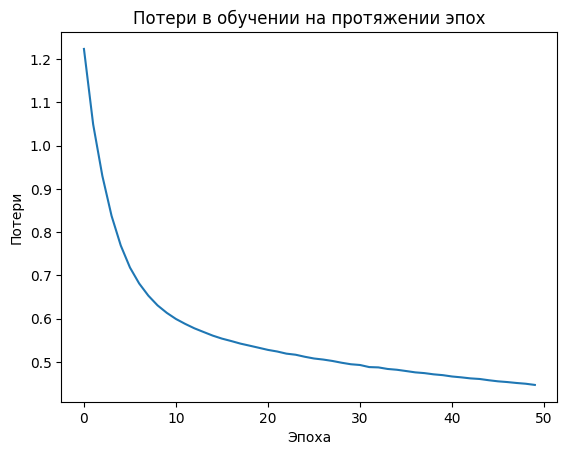

Точность сети: 85%
Точность для класса: 0 is 70.0%
Точность для класса: 1 is 96.0%
Точность для класса: 2 is 83.3%
Точность для класса: 3 is 88.0%


In [82]:
def task_6_2():
    optimizers = (torch.optim.SGD, torch.optim.Adam, torch.optim.RMSprop)
    for optimizer in optimizers:
        model = ImprovedNeuralNetwork(input_size=5, hidden_size=128, output_size=4)
        func_loss = nn.CrossEntropyLoss()
        losses = learn_model(optimizer(model.parameters(), lr=1e-4), func_loss, model, epochs=50)
        losses_plot(losses)
        predict(model)

task_6_2()

### ОЦЕНКА РЕЗУЛЬТАТОВ ОБУЧЕНИЯ МОДЕЛЕЙ, МЕТРИКИ КАЧЕСТВА КЛАССИФИКАЦИИ И СЕГМЕНТАЦИИ

In [1]:
import numpy as np

np.random.seed(42)

Y = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
Y_pred = np.random.choice([0, 1], size=100, p=[0.5, 0.5])

In [10]:
def print_confusion_matrix(tn, fp, fn, tp):
    print("      Предсказано")
    print("        0     1")
    print("    +-----+-----+")
    print(f" 0  | {tn:>3} | {fp:>3} | Истинно")
    print("    +-----+-----+")
    print(f" 1  | {fn:>3} | {tp:>3} | Истинно")
    print("    +-----+-----+")

In [12]:
import time


start_time = time.time()

tn = 0
tp = 0
fp = 0
fn = 0

for y, y_pred in zip(Y, Y_pred):
    if y == 1:
        if y_pred == y:
            tp += 1
        else:
            fn += 1
    else:
        if y_pred == y:
            tn += 1
        else:
            fp += 1

sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

precision = tp / (tp + fp)

accuracy = (tp + tn) / (tp + fp + fn + tn)

execution_time = time.time() - start_time
print_confusion_matrix(tn, fp, fn, tp)
print(f"Специфичность: {specificity:.2f}")
print(f"Предсказательная сила: {precision:.2f}")
print(f"Чувствительность: {sensitivity:.2f}")
print(f"Точность: {accuracy:.2f}")


print(f"Время выполнения: {execution_time:.4f} секунд")

      Предсказано
        0     1
    +-----+-----+
 0  |  25 |  28 | Истинно
    +-----+-----+
 1  |  24 |  23 | Истинно
    +-----+-----+
Специфичность: 0.47
Предсказательная сила: 0.45
Чувствительность: 0.49
Точность: 0.48
Время выполнения: 0.0004 секунд


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

start_time = time.time()

print(f"Чувствительность: {recall_score(Y, Y_pred):.2f}")
print(f"Предсказательная сила: {precision_score(Y, Y_pred):.2f}")
print(f"Точность: {accuracy_score(Y, Y_pred):.2f}")

execution_time = time.time() - start_time
print(f"Время выполнения: {execution_time:.4f} секунд")

Чувствительность: 0.49
Предсказательная сила: 0.45
Точность: 0.48
Время выполнения: 0.0082 секунд
